# Display of energy resolution from a monochromator
Example of use of the script [colors.py](https://github.com/awojdyla/ALS-U_Examples/blob/master/scripts/colors.py)

An OASYS version is available here: [Colors.ows](https://github.com/awojdyla/ALS-U_Examples/blob/master/OASYS_examples/Colors.ows)

## Run the Shadow simulation

In [8]:
import Shadow
import numpy

import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
from matplotlib.colors import ListedColormap

In [11]:
# Python script to run shadow3. Created automatically with ShadowTools.make_python_script_from_list().

# initialize shadow3 source (oe0) and beam
beam = Shadow.Beam()
oe0 = Shadow.Source()
oe1 = Shadow.OE()
oe2 = Shadow.OE()
oe3 = Shadow.OE()
oe4 = Shadow.OE()

oe0.FDISTR = 3
oe0.F_COHER = 1
oe0.F_COLOR = 2
oe0.F_PHOT = 0
oe0.HDIV1 = 0.0
oe0.HDIV2 = 0.0
oe0.IDO_VX = 0
oe0.IDO_VZ = 0
oe0.IDO_X_S = 0
oe0.IDO_Y_S = 0
oe0.IDO_Z_S = 0
oe0.ISTAR1 = 0
oe0.NPOINT = 50000
oe0.N_COLOR = 3
oe0.PH1 = 3849.0
oe0.PH2 = 3850.0
oe0.PH3 = 3851.0
oe0.SIGDIX = 1.34e-05
oe0.SIGDIZ = 1.31e-05
oe0.SIGMAX = 1.49e-05
oe0.SIGMAZ = 1.51e-05
oe0.VDIV1 = 0.0
oe0.VDIV2 = 0.0

oe1.DUMMY = 100.0
oe1.FWRITE = 1
oe1.T_IMAGE = 0.0
oe1.T_INCIDENCE = 89.4
oe1.T_REFLECTION = 89.4
oe1.T_SOURCE = 15.0

oe2.ALPHA = 90.0
oe2.DUMMY = 100.0
oe2.FCYL = 1
oe2.FMIRR = 2
oe2.FWRITE = 1
oe2.F_DEFAULT = 0
oe2.SIMAG = 6.9
oe2.SSOUR = 24.1
oe2.THETA = 89.4
oe2.T_IMAGE = 0.0
oe2.T_INCIDENCE = 89.4
oe2.T_REFLECTION = 89.4
oe2.T_SOURCE = 9.1

oe3.DUMMY = 100.0
oe3.FWRITE = 1
oe3.F_CENTRAL = 1
oe3.F_GRATING = 1
oe3.F_MONO = 2
oe3.F_RULING = 5
oe3.F_RUL_ABS = 1
oe3.PHOT_CENT = 3850.0
oe3.RULING = 250000.0
oe3.RUL_A1 = 72585.0
oe3.RUL_A2 = -15800.0
oe3.R_LAMBDA = 5000.0
oe3.T_IMAGE = 0.0
oe3.T_INCIDENCE = 88.6
oe3.T_SOURCE = 0.0

oe4.ALPHA = 90.0
oe4.DUMMY = 100.0
oe4.FCYL = 1
oe4.FMIRR = 2
oe4.FWRITE = 1
oe4.F_DEFAULT = 0
oe4.SIMAG = 3.9
oe4.SSOUR = 27.0
oe4.THETA = 89.4
oe4.T_IMAGE = 3.9
oe4.T_INCIDENCE = 89.4
oe4.T_REFLECTION = 89.4
oe4.T_SOURCE = 3.0

beam.genSource(oe0)

beam.traceOE(oe1,1)
beam.traceOE(oe2,2)
beam.traceOE(oe3,3)
beam.traceOE(oe4,4)


In [12]:
def display_colors(beam, N_bins = 101):
	# get the rays and their corresponding wavelength
	# ray positions
	x = beam.getshonecol(1)
	z = beam.getshonecol(3)
	# ray property associated with wavelength
	w = beam.getshonecol(19)

	# find the lowest and the highest wavelenth
	w_min = np.amin(w)
	w_max = np.amax(w)
	# divide the interval in 5 parts (each subpart will have a different color)
	dw = (w_max-w_min)/5

	# create a mask for the 5 sub-intervals
	mask1 = np.where(w<=w_min+dw)
	mask2 = np.where(np.logical_and(w > w_min+1*dw, w <= w_min+2*dw))
	mask3 = np.where(np.logical_and(w > w_min+2*dw, w <= w_min+3*dw))
	mask4 = np.where(np.logical_and(w > w_min+3*dw, w <= w_min+4*dw))
	mask5 = np.where(w >= w_max-dw)

	# divide the ray positions in N_bins (default 101) for each sub-color
	r = [[np.amin(x), np.amax(x)],[np.amin(z), np.amax(z)]]
	H,  _, _  = np.histogram2d(x,z, bins=N_bins, range=r)
	H1, _, _  = np.histogram2d(x[mask1],z[mask1],bins=N_bins, range=r)
	H2, _, _  = np.histogram2d(x[mask2],z[mask2],bins=N_bins, range=r)
	H3, _, _  = np.histogram2d(x[mask3],z[mask3],bins=N_bins, range=r)
	H4, _, _  = np.histogram2d(x[mask4],z[mask4],bins=N_bins, range=r)
	H5, _, _  = np.histogram2d(x[mask5],z[mask5],bins=N_bins, range=r)

	# create an instance of a figure
	fig = plt.figure(frameon=False)

	# colors associated with wavelength (pyplot only offer 5 colormaps easy to use)
	cmap1 = plt.cm.Purples
	cmap2 = plt.cm.Blues
	cmap3 = plt.cm.Greens
	cmap4 = plt.cm.Oranges
	cmap5 = plt.cm.Reds
	# Get the colormap colors
	my_cmap1 = cmap1(np.arange(cmap1.N))
	my_cmap2 = cmap2(np.arange(cmap2.N))
	my_cmap3 = cmap3(np.arange(cmap3.N))
	my_cmap4 = cmap4(np.arange(cmap4.N))
	my_cmap5 = cmap5(np.arange(cmap5.N))
	# Set alpha
	my_cmap1[:,-1] = np.linspace(0, 1, cmap1.N)
	my_cmap2[:,-1] = np.linspace(0, 1, cmap2.N)
	my_cmap3[:,-1] = np.linspace(0, 1, cmap3.N)
	my_cmap4[:,-1] = np.linspace(0, 1, cmap4.N)
	my_cmap5[:,-1] = np.linspace(0, 1, cmap5.N)
	# Create new colormap
	my_cmap1 = ListedColormap(my_cmap1)
	my_cmap2 = ListedColormap(my_cmap2)
	my_cmap3 = ListedColormap(my_cmap3)
	my_cmap4 = ListedColormap(my_cmap4)
	my_cmap5 = ListedColormap(my_cmap5)

	#scaling the axis of the plot
	xmin = np.amin(x)
	xmax = np.amax(x)
	zmin = np.amin(z)
	zmax = np.amax(z)

	# assuming that the scale of the system is meter
	scale_m = 1e6
	extent=(xmin*scale_m,xmax*scale_m,zmin*scale_m,zmax*scale_m)

	# compute the aspect ratio of the plot (to avoid distortions)
	aspect = (xmin-xmax)/(zmin-zmax)

	# plot each color
	im1 = plt.imshow(H1, cmap=my_cmap1, alpha=.9,extent=extent,aspect=aspect)
	im2 = plt.imshow(H2, cmap=my_cmap2, alpha=.9,extent=extent,aspect=aspect)
	im3 = plt.imshow(H3, cmap=my_cmap3, alpha=.9,extent=extent,aspect=aspect)
	im4 = plt.imshow(H4, cmap=my_cmap4, alpha=.9,extent=extent,aspect=aspect)
	im5 = plt.imshow(H5, cmap=my_cmap5, alpha=.9,extent=extent,aspect=aspect)
	
	# title and legends
	plt.title("Exit slits, E=%1.1feV, E/DE=+/-%1.0f (resolution)" % (12390*2/(w_min+w_max), (w_min+w_max)/(w_max-w_min)))
	plt.xlabel("X position [um]")
	plt.ylabel("Z position [um]")
	plt.show()



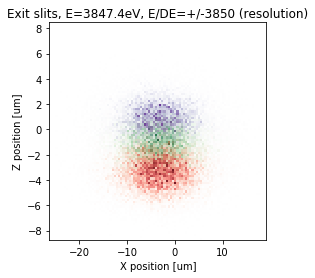

In [13]:
display_colors(beam)